In [2]:
import pandas as pd
import numpy as np

#matplotlib & seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#scikit learn
from sklearn.metrics import precision_recall_curve,average_precision_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_curve,roc_auc_score,f1_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#plotly
from plotly.graph_objs import Histogram, Figure, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True)



In [6]:
df = pd.read_csv('creditcard.csv')

In [7]:
#visualize a subset of the data from the top
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Time,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,4.000000,7.000000,7.000000,9.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233,-0.425966,1.229658,-0.644269,-0.894286,-0.338262
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737,0.960523,0.141004,1.417964,0.286157,1.119593
V3,2.536347,0.166480,1.773209,1.792993,1.548718,1.141109,0.045371,1.074380,-0.113192,1.044367
V4,1.378155,0.448154,0.379780,-0.863291,0.403034,-0.168252,1.202613,-0.492199,-0.271526,-0.222187
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193,0.420987,0.191881,0.948934,2.669599,0.499361
V6,0.462388,-0.082361,1.800499,1.247203,0.095921,-0.029728,0.272708,0.428118,3.721818,-0.246761
V7,0.239599,-0.078803,0.791461,0.237609,0.592941,0.476201,-0.005159,1.120631,0.370145,0.651583
V8,0.098698,0.085102,0.247676,0.377436,-0.270533,0.260314,0.081213,-3.807864,0.851084,0.069539
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739,-0.568671,0.464960,0.615375,-0.392048,-0.736727


In [8]:
#sanity check for null or missing values,number of column,datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#get the label
label = df["Class"]

#sanity check for missing values
print(label.isna().values.any())
print(label.isnull().values.any())



False
False


**visuallizing class plot**

check distribution to know how imbalance they are



([<matplotlib.axis.XTick at 0x7f74eac2b350>,
 [Text(0, 0, 'Normal'), Text(0, 0, 'Fraud')])

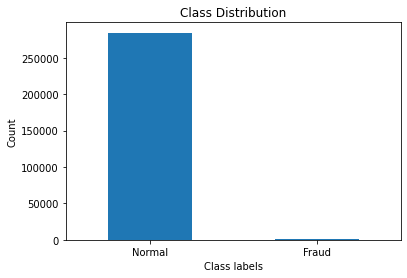

In [10]:
#bar plot for class categories
label_class = pd.value_counts(label,sort=True)

label_class.plot(kind='bar',rot=0)
plt.title('Class Distribution')
plt.xlabel('Class labels')
plt.ylabel('Count')
plt.xticks(np.arange(2),['Normal', 'Fraud'])

In [11]:
# group the class label
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
contamination = len(df[df['Class']==1])/len(df).__float__()


In [13]:
X = df.drop(columns=['Class','Time'])
y = df['Class']

In [14]:
y = y.astype(np.int8)
y[y==1] = -1
y[y==0] = 1

In [15]:
# skf = StratifiedKFold(n_splits=4)
# folds = list(skf.split(X, y))

In [16]:
# oneSVM_model = OneClassSVM()

In [17]:
# oneSVM_model = OneClassSVM(kernel='rbf', nu=contamination)
# oneSVM_model.fit(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [19]:
oneSVM_model = OneClassSVM(kernel='rbf',nu=contamination, gamma=0.005)
oneSVM_model.fit(X_train)

OneClassSVM(gamma=0.005, nu=0.001727485630620034)

In [44]:
# f1sc = make_scorer(f1_score)
# ps = {
#         "kernel":['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
#         "nu":np.linspace(0.0000000001, 1.0, 5)
#     }
# search = GridSearchCV(estimator=oneSVM_model, param_grid=ps, scoring=f1sc, cv=folds)

In [45]:
# search.fit(X, y)

In [46]:
# df = pd.DataFrame(search.cv_results_)
# df

In [47]:
# df[["mean_test_score", "std_test_score", "params"]].sort_values(by=["mean_test_score"], ascending=False).head()

In [20]:
def model_prediction(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)
    pred=clf.predict(features_test)

#     y_pred = clfee.fit_predict(X)
    
#     return pred

#     pred[pred == 1] = 0
#     pred[pred == -1] = 1
    n_errors = (pred != labels_test).sum()
    
    
    print("{}: {}".format("No. of Anomalous Points with One Class SVM ",n_errors))
    
    cnf_matrix=confusion_matrix(labels_test,pred)
    
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(10,8))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()

    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

    # plotting feature importance
#     print("\n----------AUC------------------------------------")
#     print(auc(labels_test,pred))
    
    return clf

No. of Anomalous Points with One Class SVM : 265
the recall for this model is : 0.9920146339747423
TP 28200
TN 16
FP 38
FN 227


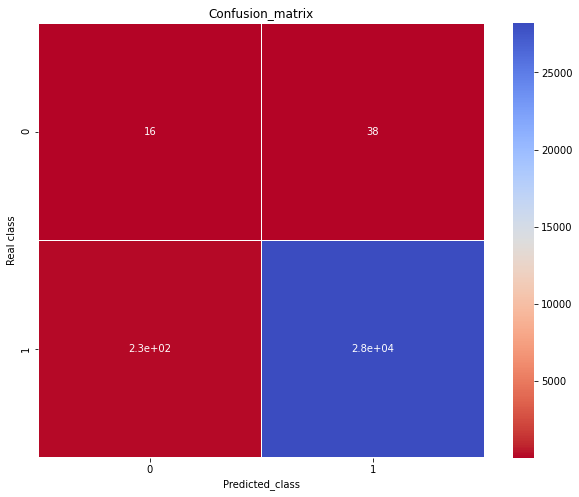


----------Classification Report------------------------------------
              precision    recall  f1-score   support

          -1       0.07      0.30      0.11        54
           1       1.00      0.99      1.00     28427

    accuracy                           0.99     28481
   macro avg       0.53      0.64      0.55     28481
weighted avg       1.00      0.99      0.99     28481



In [21]:
# model_prediction(oneSVM_model, )
pred = model_prediction(oneSVM_model, X_train, X_test, y_train, y_test)